<a href="https://colab.research.google.com/github/mx5nabcd/titanic/blob/main/titanic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 아래에 있는 링크를 참고함
# https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#아래 주석은 inline에 대한 설명
comment = '''%matplotlib inline은 도표를 포함한 그림, 소리, 애니메이션 과 같은 결과물들을
코드를 실행한 해당 브라우저에서 '바로' 볼 수 있게 해주는 코드에요.
주피터 노트북에서는 따로 입력하지 않아도 결과물을 바로 확인할 수 있지만,
브라우저에 따라 그렇지 않은 경우도 있기 때문에 그런 경우를 위해 코드잇 운영진이 미리 입력해둔 코드인 거 같다'''

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/colab_data/titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/colab_data/titanic/test.csv')
combine = [train_df, test_df]

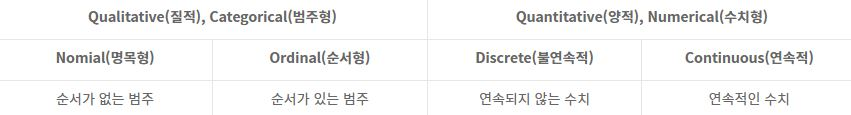

<!-- # 범주형 : Survived, Sex, and Embarked. Ordinal: Pclass.
# 연속형 : Age, Fare. Discrete: Sibsp, Parch.

# Survived : 0=사망, 1=생존
# Pclass : 1=1등석, 2=2등석, 3=3등석
# Sex : male=남성, female=여성
# Age : 나이
# Sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
# Parch : 타이타닉 호에 동승한 부모 / 자식의 수
# Ticket : 티켓 번호
# Fare : 승객 요금
# Cabin : 방 호수
# Embarked : 탑승지, C=셰르부르, Q=퀸즈타운, S=사우샘프턴 -->

In [5]:
# 데이터 열(column) 확인하기
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<!-- # 범주형 : Survived, Sex, and Embarked. Ordinal: Pclass.
# 연속형 : Age, Fare. Discrete: Sibsp, Parch.

# Survived : 0=사망, 1=생존
# Pclass : 1=1등석, 2=2등석, 3=3등석
# Sex : male=남성, female=여성
# Age : 나이
# Sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
# Parch : 타이타닉 호에 동승한 부모 / 자식의 수
# Ticket : 티켓 번호
# Fare : 승객 요금
# Cabin : 방 호수
# Embarked : 탑승지, C=셰르부르, Q=퀸즈타운, S=사우샘프턴 -->

In [6]:
# 데이터 중에 맨 앞에 5개 행(row) 확인하기
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 데이터 중에 맨 뒤에 5개 행(row) 확인하기
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# 데이터 정보 확인하기
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

# Categorical


* Categorical(범주형)
  Nomial(명목형) ex) 남자 = 1, 여자 = 0
   - Survived, Sex, Embarked
  Ordinal(순서형) ex) 좋음 = 3, 보통 = 2, 나쁨 = 1
   - Pclass

* Numerical(수치형)
  Discrete(불연속적) ex) - 1,2,3(정수)만 됨 1.1, 2.2, 3.3는 안 됨
   - Sibsp, Parch
  Continuous(연속적) ex) - 1,2,3이랑 1.1, 2,22222, 3.33333333 다 됨
   - Age, Fare
   
Survived : 0=사망, 1=생존  
Pclass : 1=1등석, 2=2등석, 3=3등석  
Sex : male=남성, female=여성  
Age : 나이  
Sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수  
Parch : 타이타닉 호에 동승한 부모 / 자식의 수  
Ticket : 티켓 번호  
Fare : 승객 요금  
Cabin : 방 호수  
Embarked : 탑승지, C=셰르부르, Q=퀸즈타운, S=사우샘프턴


In [9]:

* Categorical(범주형)
  Nomial(명목형) ex) 남자 = 1, 여자 = 0
   - Survived, Sex, Embarked
  Ordinal(순서형) ex) 좋음 = 3, 보통 = 2, 나쁨 = 1
   - Pclass

* Numerical(수치형)
  Discrete(불연속적) ex) - 1,2,3(정수)만 됨 1.1, 2.2, 3.3는 안 됨
   - Sibsp, Parch
  Continuous(연속적) ex) - 1,2,3이랑 1.1, 2,22222, 3.33333333 다 됨
   - Age, Fare
   
Survived : 0=사망, 1=생존  
Pclass : 1=1등석, 2=2등석, 3=3등석  
Sex : male=남성, female=여성  
Age : 나이  
Sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수  
Parch : 타이타닉 호에 동승한 부모 / 자식의 수  
Ticket : 티켓 번호  
Fare : 승객 요금  
Cabin : 방 호수  
Embarked : 탑승지, C=셰르부르, Q=퀸즈타운, S=사우샘프턴


In [10]:
# 데이터 분포 확인하기
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# 'O'는 Object를 의미
# include 생략하면 include='number'가 기본값
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
# 객실 등급별 생존률
# as_index = False -> 인덱스 열(column)이 생김
# ascending = False -> 내림차순
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
# 성별별 생존률
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
# SibSp(동승한 자매 / 배우자의 수)별 생존률
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
# Parch(동승한 부모 / 자식의 수)별 생존률
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


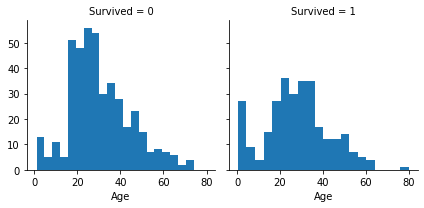

In [16]:
# 연령별 생존 유무 시각화
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


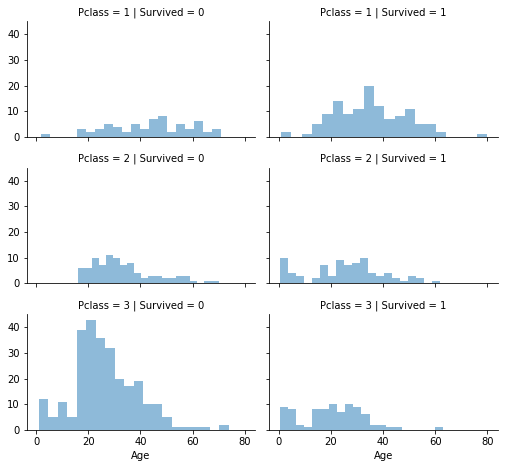

In [17]:
# 객실 등급별 생존 유무 시각화
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2,
aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


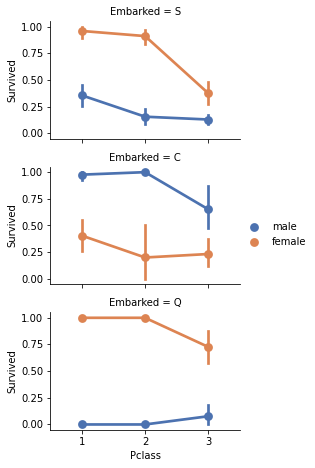

In [18]:
# 승선지별 남녀 생존 유무 시각화
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


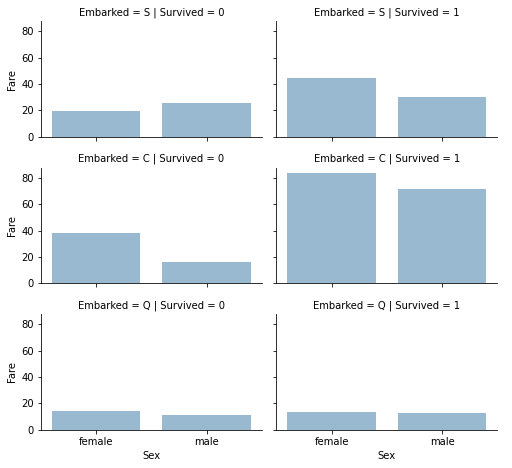

In [19]:
# 승선지별 생존 유무에 따른 요금
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [20]:
# Ticket, Cabin 열(column) 삭제하기

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [21]:
# 기존 기능에서 추출한 새 기능 만들기
# Name 특성에서 Title(Mr, Ms 등등)만 추출해 생존 간의 상관 관계 확인하기
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
# 희귀한 Title은 Rare로 묶기
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [23]:
# 문자였던 Title을 숫자로 바꾸기
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [24]:
# Name 열(column) 삭제하기
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [25]:
# Sex 열(column) 숫자로 바꾸기
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


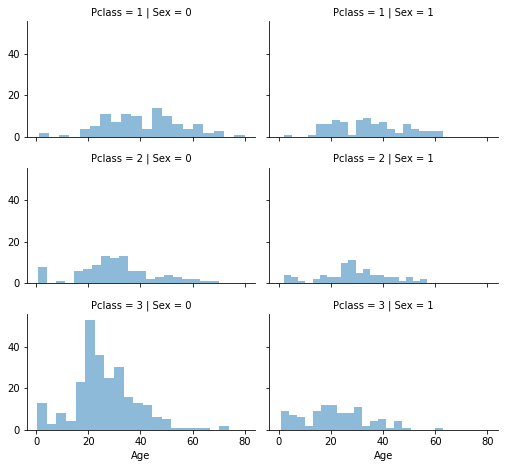

In [26]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [27]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [33]:
for dataset in combine:
  for i in range(0, 2):
    for j in range(0, 3):
      guess_df = dataset[(dataset['Sex'] == i) & \
      (dataset['Pclass'] == j+1)]['Age'].dropna()

      age_guess = guess_df.median()

      guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5

  for i in range(0, 2):
    for j in range(0, 3):
      dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                  'Age'] = guess_ages[i,j]

  dataset['Age'] = dataset['Age'].astype(int)

train_df.head()   

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [34]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909
